# ActionCSA demo

Sine potential model. 

With periodic potential,Package doing it automaticaly and use label to gather data

1. Action CSA


# Periodic potential

Since we are finding multiple pathway, we need toy example that has multiple pathways. Here, we are going to use simple periodic model.

f

In [1]:
import numpy as np
from taps.coords.cartesian import Cartesian
from taps.model.model import PeriodicModel3
from taps.paths import Paths
from taps.db.data import ImageData

N = 300
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
coords = Cartesian(coords=np.array([x, y]))
model = PeriodicModel3()
directory = '/home/schinavro/libCalc/taps/examples/flattest2/'
imgdata = ImageData(directory + "cos_poten.db")
paths = Paths(coords=coords, model=model, imgdata=imgdata)

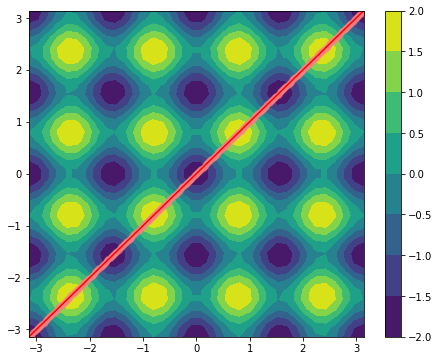

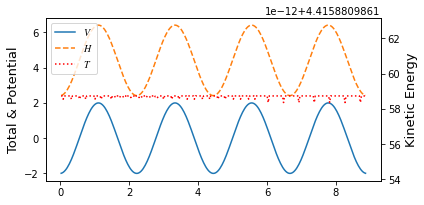

In [2]:
from taps.visualize import view
view(paths, calculate_map=True)

Action name  : Onsager Machlup + Energy conservation
Target energy: -0.2
Target type  : manual
muE          : 1.0
gamma        : 1.0
            Iter   nfev   njev        S   dS_max
converg :    306    314    314  40.1880   5.3270
converg :    310    321    321  40.1305   4.0814
converg :    312    326    326  40.1166   0.5098
jac_max > tol(0.01); Run without gradient
converg :    313    330    330  40.1116   2.3254


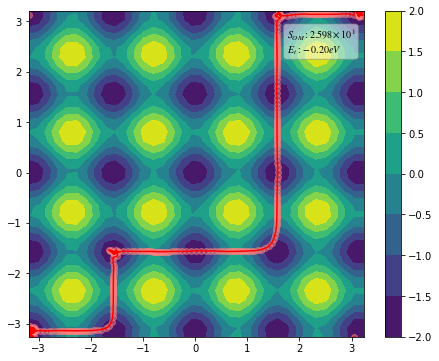

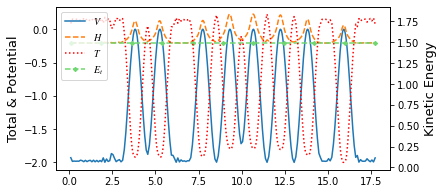

In [3]:
from taps.pathfinder import DAO, GPAO

search_kwargs = {"method":"L-BFGS-B",
                  "options": {'disp': None,
                              'maxcor': 20,
                              'ftol': 2.220446049250313e-4,
                              'gtol': 1e-03,
                              'eps': 5e-6, 
                              'maxfun': 1000,
                              'maxiter': 1000,
                              'iprint': -1, 'maxls': 100,
                              'finite_diff_rel_step': 1e-6}}
finder = DAO(prj_search = False, muE=1.,tol = 1e-2,gam = 1., Et = -0.2,
            action_name = ['Onsager Machlup', "Energy conservation"],
            search_kwargs = search_kwargs)

paths.finder = finder
paths.coords.epoch = 15
paths.fluctuate(fluctuation=5)
paths.search()
view(paths, calculate_map=True)

In [6]:
from taps.ml import Gaussian
from taps.ml.kernels.periodic import PeriodicKernel
from taps.pathfinder import GPAO


hyperparameters = {'sigma_f': 1, 'sigma_n^f': 1e-3, 
                   'sigma_n^e':1e-2, 'l^2': 0.1}
hyperparameters_bounds = {'sigma_f': (1e-1, 1e4), 'sigma_n^f': (1e-4, 1e-2), 
                          'sigma_n^e':(1e-4, 1e-1), 'l^2': (1e-4, 4)}

#model = 
model = Gaussian(real_model=PeriodicModel3(),
                 kernel=PeriodicKernel(),
                 hyperparameters=hyperparameters,
                 hyperparameters_bounds=hyperparameters_bounds)
#finder = DAO(prj_search = False, muE=1.,tol = 1e-2,gam = 1., Et = -0.2,
#            action_name = ['Onsager Machlup', "Energy conservation"],
#            search_kwargs = search_kwargs)
finder = GPAO(real_finder= DAO(prj_search = False, muE=1.,tol = 1e-2,gam = 1., Et = -0.2,
            action_name = ['Onsager Machlup', "Energy conservation"],
            search_kwargs = search_kwargs), 
              label= directory + "gpao_2/1", phases=["auto et"],
             plot=view)

paths = Paths(coords=coords, model=model, finder=finder, imgdata=imgdata)

paths.add_data(index=[0, paths.N//2, -1])
paths.search()

/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarn

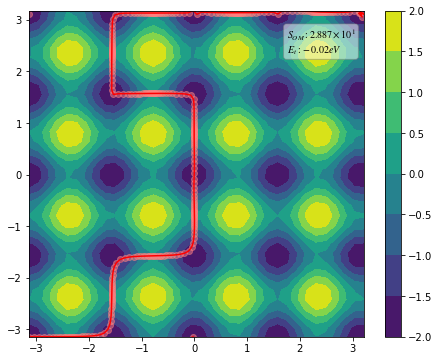

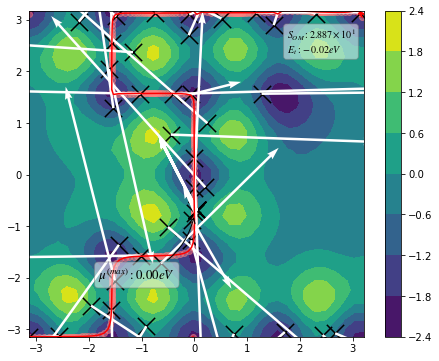

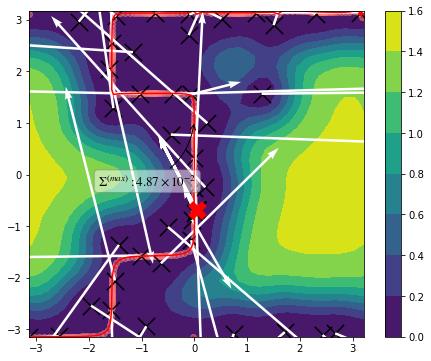

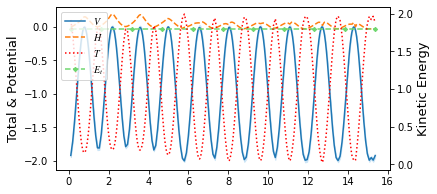

In [5]:
view(paths, calculate_map=True, gaussian=True)

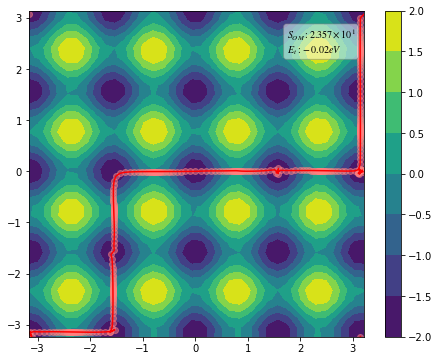

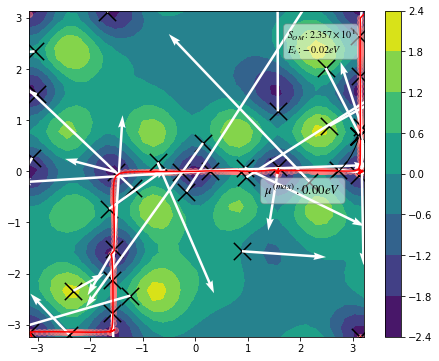

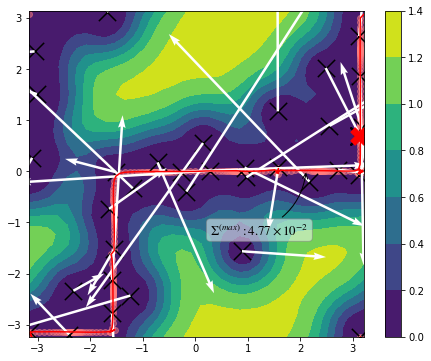

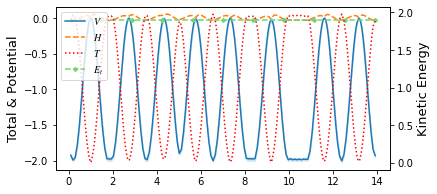

In [8]:
view(paths, calculate_map=True, gaussian=True)

In [7]:
paths.model.hyperparameters

{'sigma_f': 1.6813543918962348,
 'l^2': 0.1663512819664585,
 'sigma_n^e': 0.000706995988113702,
 'sigma_n^f': 0.0001326383505341992}

# I want to create various pathways. 

# Save it. More elegantly,
plot kwargs

# Restartable
TODO: Log 


# USE Population

In [9]:
from taps.population import Population
pop=Population()

In [15]:
child = pop.generate_candidate(sample=[paths])

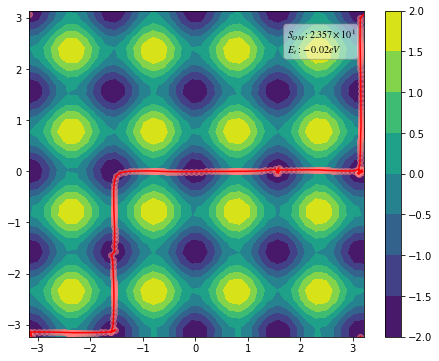

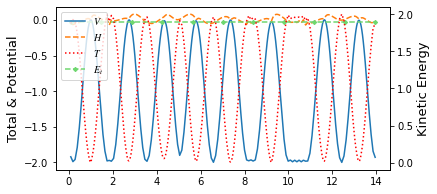

In [17]:
view(child)

/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/schinavro/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarn

KeyboardInterrupt: 

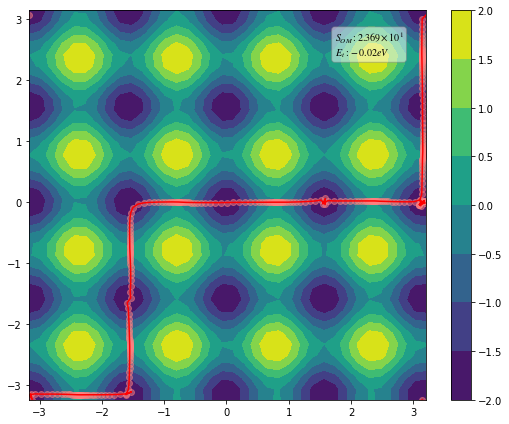

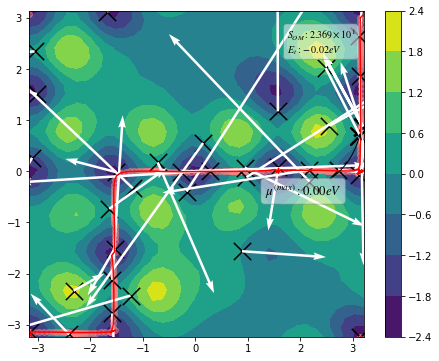

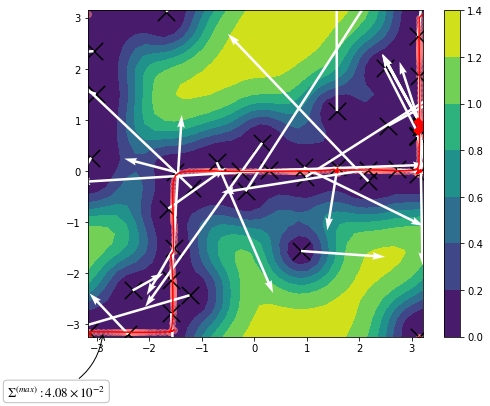

In [18]:
pop.register_candidate(child)

# Action-CSA with flatten potential, AuPassivation, alanine dipeptide

simpleperiodic 

In [4]:
auto_paths.get_velocity().shape

(2, 1, 299)